In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import classification_report

In [3]:
def standardize(column):
    return (column - column.mean()) / column.std()

def apply(X):
    cols=list(X)
    for i in cols:
        X[i]=standardize(X[i])

In [5]:
df = pd.read_csv('synthetic_dataset.csv')
df = df.set_index('Unnamed: 0')
# df[df.drop(['Outcome'],axis=1).columns] = scaler.fit_transform(df[df.drop(['Outcome'],axis=1).columns])
X = df.drop(['Outcome'],axis = 1)
y = df['Outcome']
X_train, X_test,y_train, y_test = train_test_split(X, y ,random_state=101, test_size=0.3, shuffle=True)
apply(X_train)
apply(X_test)

In [6]:
class Model:
    y = []
    X = []
    w = []
    epochs = 0
#     alpha = 0.0001
    features = 0
    samples = 0
    def __init__(self,X,y,epochs = 500,alpha=0.1):
        self.X = np.hstack((np.ones((X.shape[0],1)),X))
        self.y = np.array(y)
        self.w = np.zeros(self.X.shape[1])
        self.samples = X.shape[0]
        self.epochs = epochs
        self.features = X.shape[1]+1
        self.alpha = alpha
    
    def fit(self):
        for epoch_counter in range (0,self.epochs):
            for sample_counter in range(0,self.samples):
                output = np.dot(self.X[sample_counter],self.w)-self.y[sample_counter]
                for feature_counter in range(0,self.features):
                    derivative = output*self.X[sample_counter][feature_counter]
                    self.w[feature_counter]-=derivative*self.alpha
            
    def predict(self,X_test):
        X_test1 = np.hstack((np.ones((X_test.shape[0],1)),X_test))
        predictions = []
        for x in X_test1:
            predictions.append(np.dot(x,self.w))
        return np.array(predictions)

In [7]:
myModel = Model(X_train,y_train,500,0.0001)
model = LinearRegression()
myModel.fit()
model.fit(X_train,y_train)

LinearRegression()

sklearn: 0.41460863629860056 myModel: 0.41471222029093174


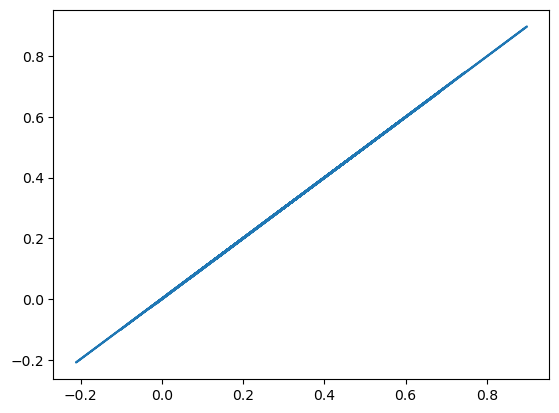

In [8]:
myPredictions = myModel.predict(X_test)
predictions = model.predict(X_test)
plt.plot(predictions,myPredictions)
print(f"sklearn: {np.sqrt(mean_squared_error(y_test, predictions))} myModel: {np.sqrt(mean_squared_error(y_test, myPredictions))}")

In [9]:
def discriminant(x):
    if x<0.5:
        return 0
    return 1

In [10]:
myPredictions

array([ 0.07855866,  0.12818042,  0.25708884,  0.30313807,  0.19391412,
        0.41562126,  0.48559575,  0.31773338,  0.33230355,  0.32454585,
        0.52539441,  0.09108955,  0.50759295,  0.06290463,  0.09739727,
        0.70329049,  0.21315748,  0.1648745 ,  0.08127629,  0.63744099,
        0.62894052,  0.240654  ,  0.40353721,  0.13834665,  0.20548457,
        0.01759681,  0.09334301,  0.12675417,  0.2701436 ,  0.43530174,
        0.68075121,  0.48431566,  0.47167513,  0.19844846,  0.02672287,
        0.32047488,  0.19772883,  0.31966109,  0.56133769,  0.2189053 ,
        0.22995447,  0.09442277,  0.10999285,  0.15868153,  0.2523931 ,
        0.51328939,  0.13984846,  0.09177622,  0.65806128,  0.49755889,
        0.39989849,  0.4789209 , -0.02872223,  0.52424834,  0.61005029,
        0.05931197,  0.69717837,  0.464079  ,  0.42886157,  0.54123649,
        0.66675501,  0.43726742,  0.57149645, -0.02958765,  0.58199488,
        0.53133942,  0.25706946,  0.45934532,  0.12386412,  0.59

In [11]:
vectorized_discriminant = np.vectorize(discriminant)
rounded_predictions = vectorized_discriminant(predictions)
rounded_predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [12]:
print(classification_report(y_test, rounded_predictions, target_names=["class 0","class 1"]))

              precision    recall  f1-score   support

     class 0       0.77      0.91      0.83        99
     class 1       0.73      0.47      0.57        51

    accuracy                           0.76       150
   macro avg       0.75      0.69      0.70       150
weighted avg       0.75      0.76      0.74       150



In [13]:
rounded_mypredictions = vectorized_discriminant(predictions)
rounded_mypredictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [14]:
print(classification_report(y_test, rounded_mypredictions, target_names=["class 0","class 1"]))

              precision    recall  f1-score   support

     class 0       0.77      0.91      0.83        99
     class 1       0.73      0.47      0.57        51

    accuracy                           0.76       150
   macro avg       0.75      0.69      0.70       150
weighted avg       0.75      0.76      0.74       150

